## Customer Segmentation using RFM Analysis

<b>Goal :</b> The goal of this analysis is to identify customer segments for retail dataset of a global superstore for 4 years using RFM analysis and to understand how those groups differ from each other.

<b>Customer Segmentation </b>is the practice of dividing a company's customers into groups that reflect similarity among customers in each group. The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business.

<b>RFM analysis</b> stands for recency, frequency and monetary value. RFM analysis enables marketers to increase revenue by targeting specific groups of existing customers (i.e., customer segmentation) with messages and offers that are more likely to be relevant based on data about a particular set of behaviors. This leads to increased response rates, customer retention, customer satisfaction, and customer lifetime value (CLTV).

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import squarify

In [2]:
# rounding to two decimal places in pandas
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
%%time
data = pd.read_excel("superstore_dataset2011-2015.xlsx")

CPU times: total: 12.6 s
Wall time: 14.2 s


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [5]:
data.head(1).T

,0
Row ID,42433
Order ID,AG-2011-2040
Order Date,2011-01-01 00:00:00
Ship Date,2011-06-01 00:00:00
Ship Mode,Standard Class
Customer ID,TB-11280
Customer Name,Toby Braunhardt
Segment,Consumer
City,Constantine
State,Constantine


In [6]:
#changing the name of columns in list comprehension & assigning it back to the dataframe
data.columns=[col.lower().replace(' ',"_").replace('-','_') for col in data.columns]

In [7]:
data = data.drop(['row_id', 'ship_date', 'customer_name', 'postal_code', 'shipping_cost', 'order_priority'],axis=1)

In [8]:
data['order_date'] = pd.to_datetime(data['order_date'])

In [9]:
#removing null values
data=data[pd.notnull(data['customer_id'])]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      51290 non-null  object        
 1   order_date    51290 non-null  datetime64[ns]
 2   ship_mode     51290 non-null  object        
 3   customer_id   51290 non-null  object        
 4   segment       51290 non-null  object        
 5   city          51290 non-null  object        
 6   state         51290 non-null  object        
 7   country       51290 non-null  object        
 8   market        51290 non-null  object        
 9   region        51290 non-null  object        
 10  product_id    51290 non-null  object        
 11  category      51290 non-null  object        
 12  sub_category  51290 non-null  object        
 13  product_name  51290 non-null  object        
 14  sales         51290 non-null  float64       
 15  quantity      51290 non-null  int64 

In [11]:
print(max(data['order_date']))

2014-12-31 00:00:00


In [12]:
# Analysis as of: 2015-01-31 bcz max order date in the dataset is 2014-12-31
today=datetime.strptime('2015-01-31', '%Y-%m-%d') #converting string into given format

### Dataset overview

The retail dataset of a global superstore for years 2011-2015 is used in this analysis. It contains information about:
-  order, order date, ship mode
-  ordered products, their category
-  customer, type of customer, location
-  sales, quantity, profit, discount

Number of records in the dataset: 51,290

In [13]:
data.head()

,order_id,order_date,ship_mode,customer_id,segment,city,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,AG-2011-2040,2011-01-01,Standard Class,TB-11280,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14
1,IN-2011-47883,2011-01-01,Standard Class,JH-15985,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04
2,HU-2011-1220,2011-01-01,Second Class,AT-735,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64
3,IT-2011-3647632,2011-01-01,Second Class,EM-14140,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.05
4,IN-2011-47883,2011-01-01,Standard Class,JH-15985,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77


### Recency, Frequency, Monetary

RFM model combines three different customer attributes to rank customers:
- <b>Recency (R)</b>: Who have purchased recently? Number of days since last purchase
- <b>Frequency (F)</b>: Who has purchased frequently? The total number of purchases
- <b>Monetary Value(M)</b>: Who has high purchase amount? The total money customer spent
If the customer bought in recent past, he gets higher points. If he bought many times, he gets higher score. And if he spent a lot of money, he gets more points.




How to create segments?
- Concatenate all scores into one, eg: 3-4-1 (R-F-M) and group customers according to those values. It gives 125(5^3, values ranging b/w 1,5) combinations which is difficult to depict and understand
- Sum all scores into one, eg: 8 (3 + 4 + 1) and group customers according to this number. It creates 13(score ranges b/w 3,15) groups which is much easier to work with but it disregards relations between R & F & M
- Segment customers based on set of rules applied to R-F-M scores. It creates 10 groups, such as "champions", "needing attention" or "at risk"

-  <b>customer_id</b> will uniquely define our customers,
-  <b>order_date</b> help us calculate RECENCY of purchase,
-  <b>order_id</b> helps us to count the number of time transaction performed(FREQUENCY),
-  <b>sales</b> will help us to calculate the total purchased amount(MONETARY).

In [14]:
d_rfm= data.groupby('customer_id').agg({'order_date': lambda date: (today - date.max()).days,
                                        'order_id': lambda num: len(num),
                                        'sales': lambda price: price.sum()}).reset_index(0)

In [15]:
#changing the name of columns
d_rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

In [16]:
d_rfm

,customer_id,recency,frequency,monetary
0,AA-10315,39,42,"13,747.41"
1,AA-10375,37,42,"5,884.19"
2,AA-10480,148,38,"17,695.59"
3,AA-10645,57,73,"15,343.89"
4,AA-315,33,8,"2,243.26"
...,...,...,...,...
1585,YS-21880,40,54,"18,703.61"
1586,ZC-11910,231,1,7.17
1587,ZC-21910,34,84,"28,472.82"
1588,ZD-11925,34,18,"2,951.23"


#### Assignment of RFM Score

In [17]:
#Recency Score we need to give inverse labels as the more active the customer is the lower the value of Recency.
r_labels, f_labels, m_labels = range(5, 0, -1), range(1,6), range(1,6)

#Dividing the recency,frequency and monetary data(numerical) into 5 quantile and assigning them respective scores using labels.
d_rfm['r_score'] = pd.qcut(d_rfm['recency'], q=5, labels=r_labels).astype(int)
d_rfm['f_score'] = pd.qcut(d_rfm['frequency'], q=5, labels=f_labels).astype(int)
d_rfm['m_score'] = pd.qcut(d_rfm['monetary'], q=5, labels=m_labels).astype(int)

#calculating the overall RFM score by summing up the three scores.
d_rfm['rfm_sum'] = d_rfm['r_score'] + d_rfm['f_score'] + d_rfm['m_score']

In [18]:
d_rfm

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_sum
0,AA-10315,39,42,"13,747.41",5,4,4,13
1,AA-10375,37,42,"5,884.19",5,4,3,12
2,AA-10480,148,38,"17,695.59",2,3,5,10
3,AA-10645,57,73,"15,343.89",4,5,5,14
4,AA-315,33,8,"2,243.26",5,1,2,8
...,...,...,...,...,...,...,...,...
1585,YS-21880,40,54,"18,703.61",5,4,5,14
1586,ZC-11910,231,1,7.17,1,1,1,3
1587,ZC-21910,34,84,"28,472.82",5,5,5,15
1588,ZD-11925,34,18,"2,951.23",5,3,2,10


#### Assignment of segment

In [19]:
def assign_label(data, r_rule, fm_rule, label, colname='rfm_label'):
    data.loc[(data['r_score'].between(r_rule[0], r_rule[1])) & (data['f_score'].between(fm_rule[0], fm_rule[1])), colname] = label
    return data

In [20]:
d_rfm['rfm_label'] = ''

d_rfm = assign_label(d_rfm, (5,5), (4,5), 'champions')
d_rfm = assign_label(d_rfm, (3,4), (4,5), 'loyal customers')
d_rfm = assign_label(d_rfm, (4,5), (2,3), 'potential loyalist')
d_rfm = assign_label(d_rfm, (5,5), (1,1), 'new customers')
d_rfm = assign_label(d_rfm, (4,4), (1,1), 'promising')
d_rfm = assign_label(d_rfm, (3,3), (3,3), 'needing attention')
d_rfm = assign_label(d_rfm, (3,3), (1,2), 'about to sleep')
d_rfm = assign_label(d_rfm, (1,2), (3,4), 'at risk')
d_rfm = assign_label(d_rfm, (1,2), (5,5), 'cant loose them')
d_rfm = assign_label(d_rfm, (1,2), (1,2), 'hibernating')

In [21]:
d_rfm

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_sum,rfm_label
0,AA-10315,39,42,"13,747.41",5,4,4,13,champions
1,AA-10375,37,42,"5,884.19",5,4,3,12,champions
2,AA-10480,148,38,"17,695.59",2,3,5,10,at risk
3,AA-10645,57,73,"15,343.89",4,5,5,14,loyal customers
4,AA-315,33,8,"2,243.26",5,1,2,8,new customers
...,...,...,...,...,...,...,...,...,...
1585,YS-21880,40,54,"18,703.61",5,4,5,14,champions
1586,ZC-11910,231,1,7.17,1,1,1,3,hibernating
1587,ZC-21910,34,84,"28,472.82",5,5,5,15,champions
1588,ZD-11925,34,18,"2,951.23",5,3,2,10,potential loyalist


#### RFM Customer Segments

- <b>Champions</b> - bought recently, buy often and spend the most
- <b>Loyal Customers</b> - spend good money and often, responsive to promotions
- <b>Potential Loyalist</b> - recent customers, but spent a good amount and bought more than once
- <b>New Customers</b> - bought most recently, but not often
- <b>Promising</b> - recent shoppers, but haven’t spent much
- <b>Needing Attention</b> - above average recency, frequency and monetary values; may not have bought very recently though
- <b>About To Sleep</b> - below average recency, frequency and monetary values; will lose them if not reactivated
- <b>At Risk</b> - spent big money and purchased often but long time ago; need to bring them back
- <b>Can't Loose Them</b> - made biggest purchases, and often but haven’t returned for a long time
- <b>Hibernating</b> - last purchase was long back, low spenders and low number of orders

The higher the overall RFM score (in a range from 3 to 15), the more valuable the customer.

### Distribution of Recency, Frequency and Monetary

Recency distribution is right-skewed, showing that the majority of customers made a purchase in the recent past. It has a long tail containing single customers who made their order long time ago.

Both frequency and monetary distributions are bimodal (with two different peaks - modes). The chart reveals that one group of customers has low frequency (small number of orders, around 10 per customer) and another group is much more "loyal" (with around 50 purchases per customer). When it comes to monetary, it follows similar pattern. Part of customers have only spent little amount of money but there is another (significant in size) group that have spent much more.

Frequency and monetary distributions suggest that there are visible differences between different groups of customers. By looking at the distribution of three the biggest segments: "loyal customers", "hibernating", "potential loyalist" it's easy to see that indeed they build up different parts of total distribution, eg. hibernating customers are responsible for first monetary peak and loyal customers for the second peak.

#### How to get the max and min value of recency, freq and monetary for each label?

In [22]:
d_rfm.groupby('rfm_label').agg({"customer_id":"count"}).sort_values("customer_id",ascending=False)

,customer_id
rfm_label,
hibernating,422
loyal customers,325
potential loyalist,210
champions,202
at risk,167
about to sleep,83
needing attention,77
cant loose them,45
promising,37


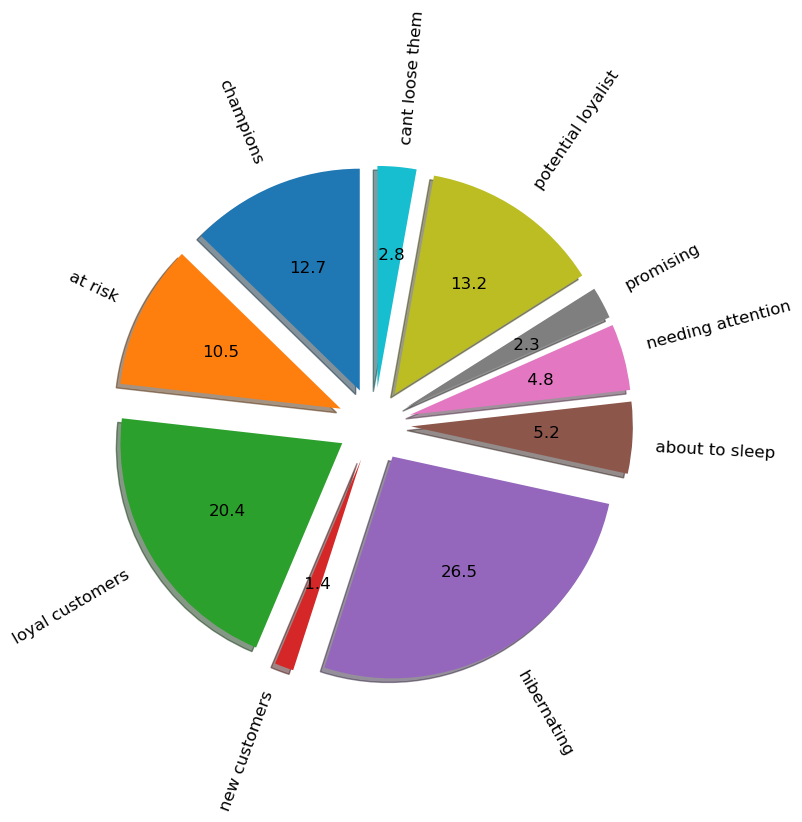

In [23]:
#colors  = ("darkorange", "darkseagreen", "orange", "cyan", "cadetblue", "hotpink", "lightsteelblue", "coral",  "mediumaquamarine","palegoldenrod")
explodes = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]

d_rfm["rfm_label"].value_counts(sort=False).plot.pie(
                                                 textprops={'fontsize': 12}, 
                                                 autopct = '%4.1f',
                                                 startangle= 90, 
                                                 radius =1.5, 
                                                 rotatelabels=True,
                                                 shadow = True, 
                                                 explode = explodes)
plt.ylabel("");

D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


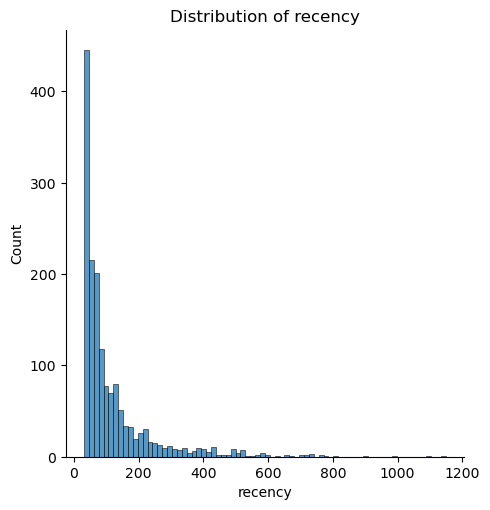

D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


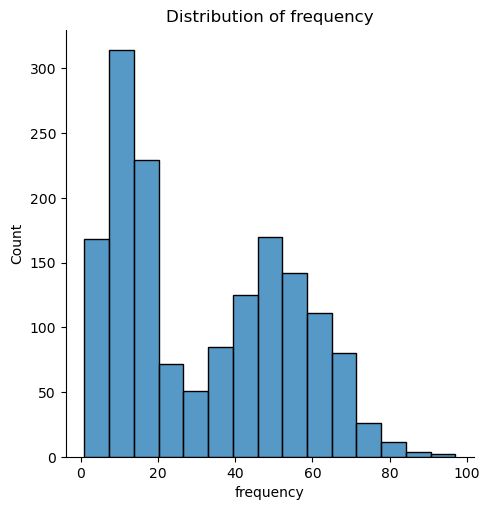

D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


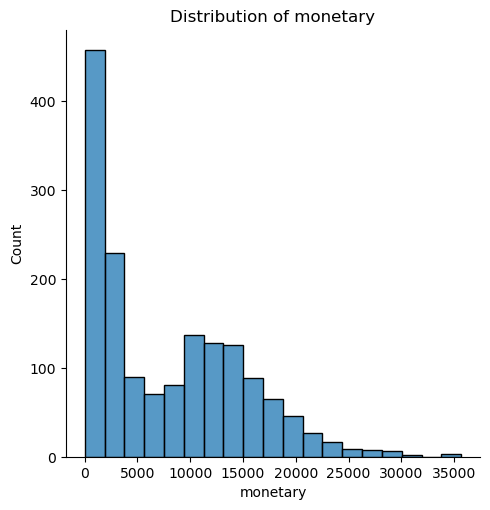

In [24]:
colnames = ['recency', 'frequency', 'monetary']

for col in colnames:
    sns.displot(d_rfm[col])
    plt.title('Distribution of %s' % col)
    plt.show()

D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


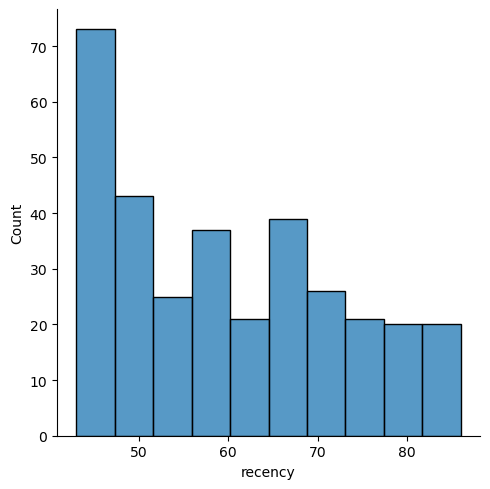

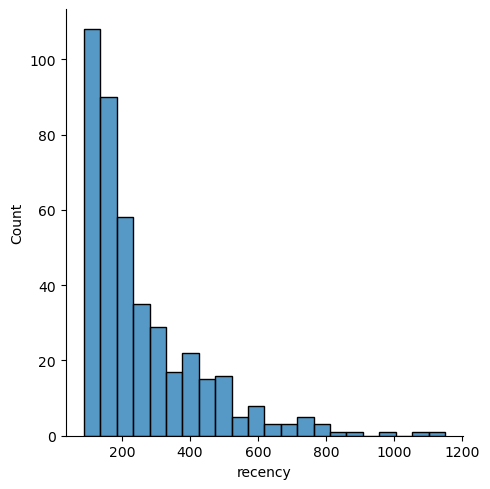

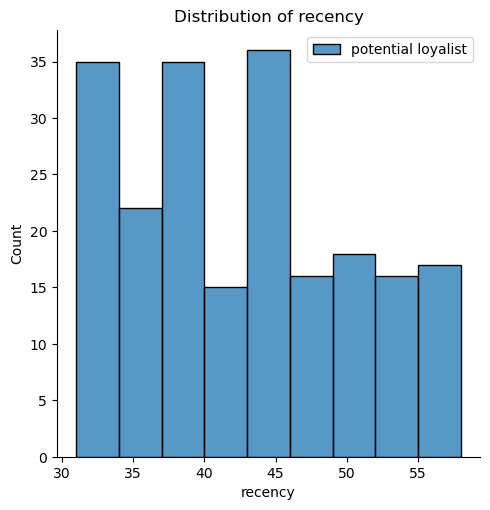

D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


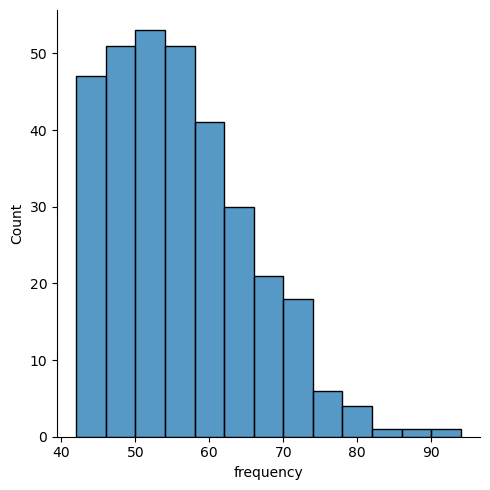

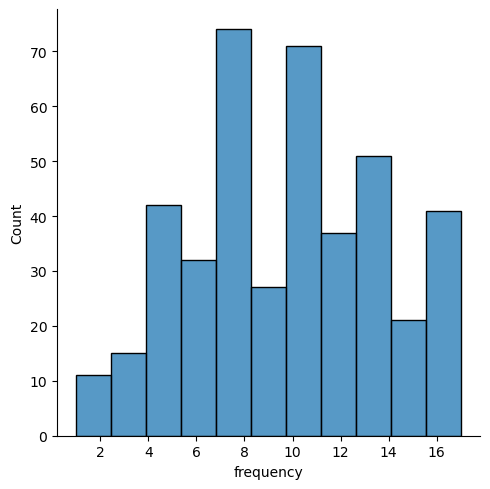

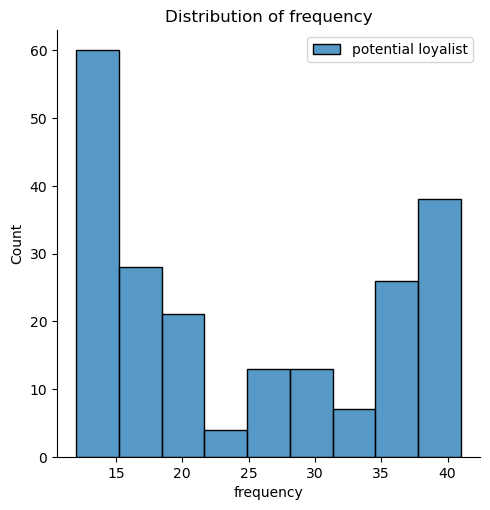

D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


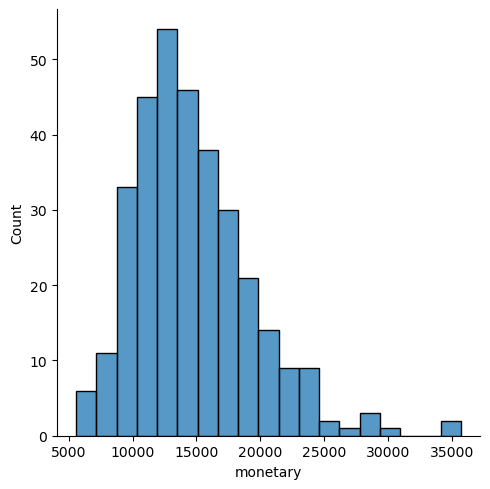

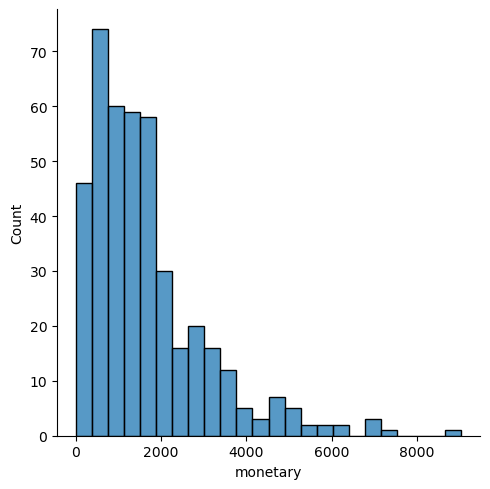

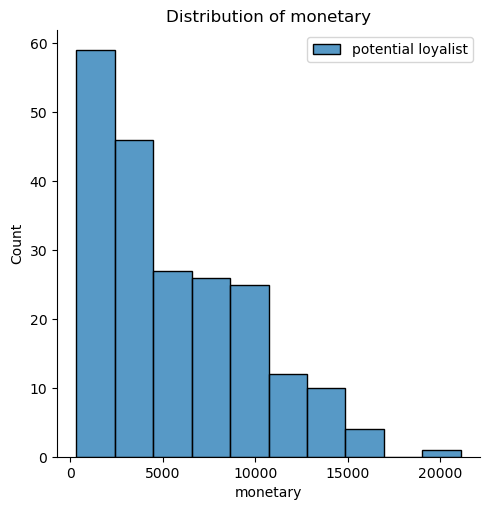

In [25]:
segments = ['loyal customers', 'hibernating', 'potential loyalist']

for col in colnames:
    #fig, ax = plt.subplots(figsize=(12,3))
    for segment in segments:
        sns.displot(d_rfm[d_rfm['rfm_label']==segment][col], label=segment)
    #ax.set_title('Distribution of %s' % col)
    plt.title('Distribution of %s' % col)
    plt.legend()
    plt.show()

### Analysis of RFM Segments


Analysis of clusters obtained by summing up RFM scores shows that their sizes are quite similar. There is a peak around score = 12 which shows that the group of customers from segments 11-13 is numerous - those are the customers that generate stable, significant income. The smallest segment is for RFM score = 15 - it's understandable cause those are the most valuable gems in the customer base. Although it's the smallest group, it is still quite big in size.

Analysis of clusters based on set of rules applied to R-F-M scores is much more diverse. It's good to see that 'loyal customers' and 'potential loyalists' constitute around 1/3 of all customers (generating almost 1/2 of sales). What is more, there is strong group of 'champions' who are the most profitable customers (13% of all customers generating 25% of all sales). At the same time it should worry that group of 'hibernating' is so big - over 1/4 of all customers. There is an opportunity that part of this group could be reactivated with a reach out campaign. Moreover, the company should focus on the group 'at risk' to increase customer retention (they generate 10% of total sales).

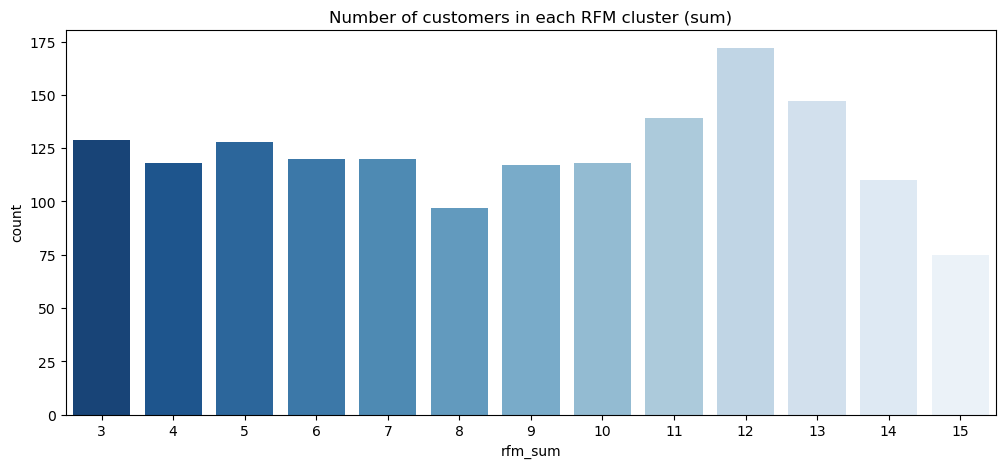

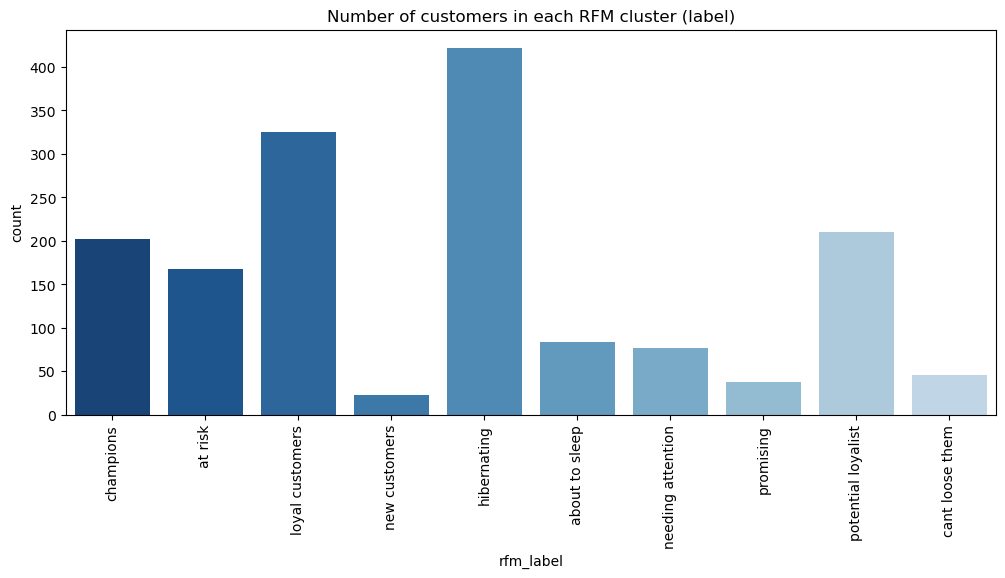

In [26]:
palette = sns.color_palette("Blues_r", n_colors=13)

for rfm_type in ['sum', 'label']:
    fig, ax = plt.subplots(figsize=(12,5))
    sns.countplot(x='rfm_'+rfm_type, data=d_rfm, palette=palette)
    ax.set_title('Number of customers in each RFM cluster (%s)' % rfm_type)
    if rfm_type == 'label':
        plt.xticks(rotation=90)
    plt.show()

#### Building Marketing Strategies

In [27]:
d_rfm[["recency", "frequency", "monetary"]].agg(["mean"])

,recency,frequency,monetary
mean,118.62,32.26,"7,951.26"


In [28]:
agg_dict = {
    'customer_id': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'sum'
}
d_analysis = d_rfm.groupby('rfm_label').agg(agg_dict).sort_values(by='recency').reset_index()
d_analysis.rename({'customer_id': 'tot_customer','recency': 'recency_mean','frequency': 'frequency_mean','monetary': 'monetary_sum'}, axis=1, inplace=True)
d_analysis['tot_customer_share'] = d_analysis['tot_customer'] / d_analysis['tot_customer'].sum()
d_analysis['monetary_share'] = d_analysis['monetary_sum'] / d_analysis['monetary_sum'].sum()
d_analysis['mntry_per_cust'] = d_analysis['monetary_sum'] / d_analysis['tot_customer']

In [29]:
d_analysis

,rfm_label,tot_customer,recency_mean,frequency_mean,monetary_sum,tot_customer_share,monetary_share,mntry_per_cust
0,champions,202,35.43,57.41,"3,098,808.74",0.13,0.25,"15,340.64"
1,new customers,22,35.82,7.95,"28,544.05",0.01,0.00,"1,297.46"
2,potential loyalist,210,42.31,24.94,"1,187,992.88",0.13,0.09,"5,657.11"
3,promising,37,49.62,8.59,"46,012.20",0.02,0.00,"1,243.57"
4,loyal customers,325,60.10,55.69,"4,784,036.05",0.20,0.38,"14,720.11"
5,needing attention,77,71.97,28.74,"488,906.71",0.05,0.04,"6,349.44"
6,about to sleep,83,73.01,11.04,"142,555.12",0.05,0.01,"1,717.53"
7,cant loose them,45,111.18,63.62,"783,396.13",0.03,0.06,"17,408.80"
8,at risk,167,154.99,34.41,"1,383,388.51",0.11,0.11,"8,283.76"
9,hibernating,422,255.72,9.77,"698,861.54",0.27,0.06,"1,656.07"


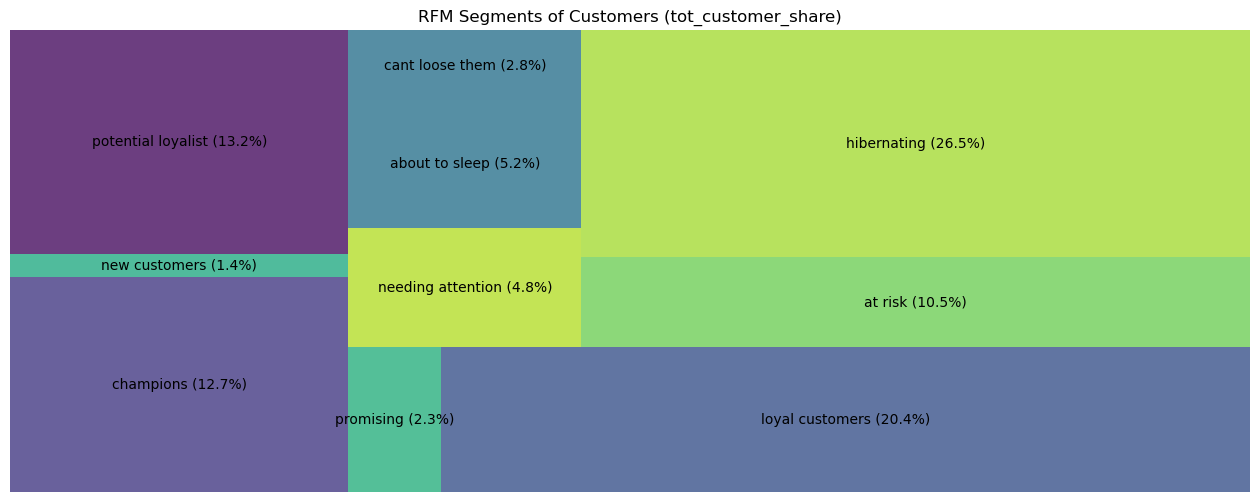

In [30]:
    labels = d_analysis['rfm_label'] + d_analysis['tot_customer_share'].apply(lambda x: ' ({0:.1f}%)'.format(x*100))

    fig, ax = plt.subplots(figsize=(16,6))
    squarify.plot(sizes=d_analysis['tot_customer_share'], label=labels, alpha=.8)
    ax.set_title('RFM Segments of Customers (tot_customer_share)')
    plt.axis('off')
    plt.show()

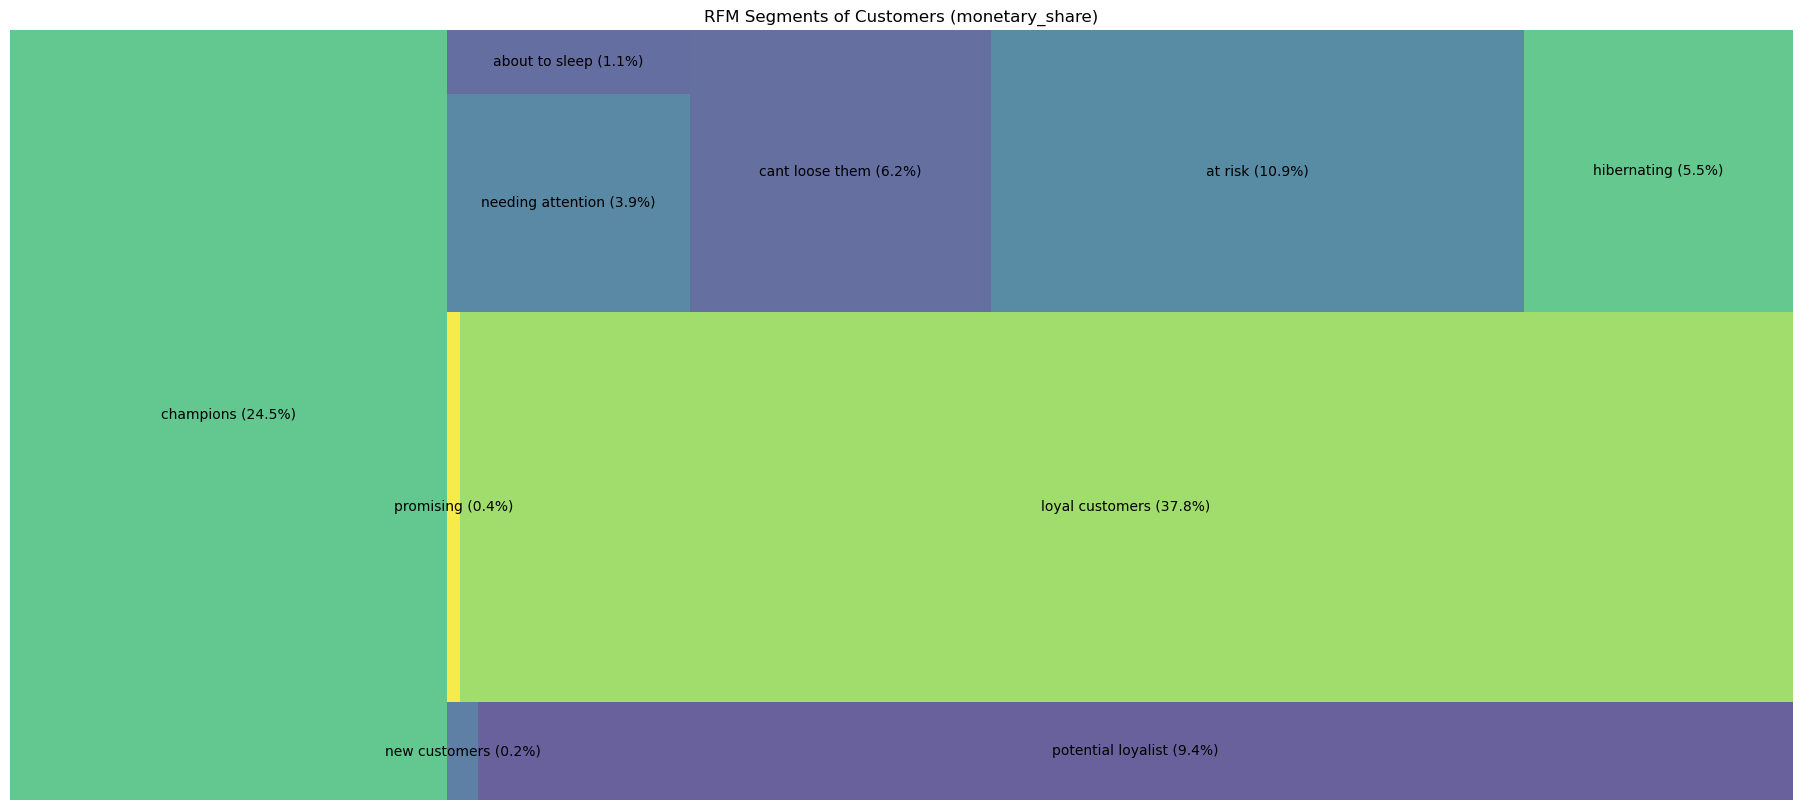

In [31]:
    labels = d_analysis['rfm_label'] + d_analysis['monetary_share'].apply(lambda x: ' ({0:.1f}%)'.format(x*100))

    fig, ax = plt.subplots(figsize=(23,10))
    squarify.plot(sizes=d_analysis['monetary_share'], label=labels, alpha=.8)
    ax.set_title('RFM Segments of Customers (monetary_share)')
    plt.axis('off')
    plt.show()

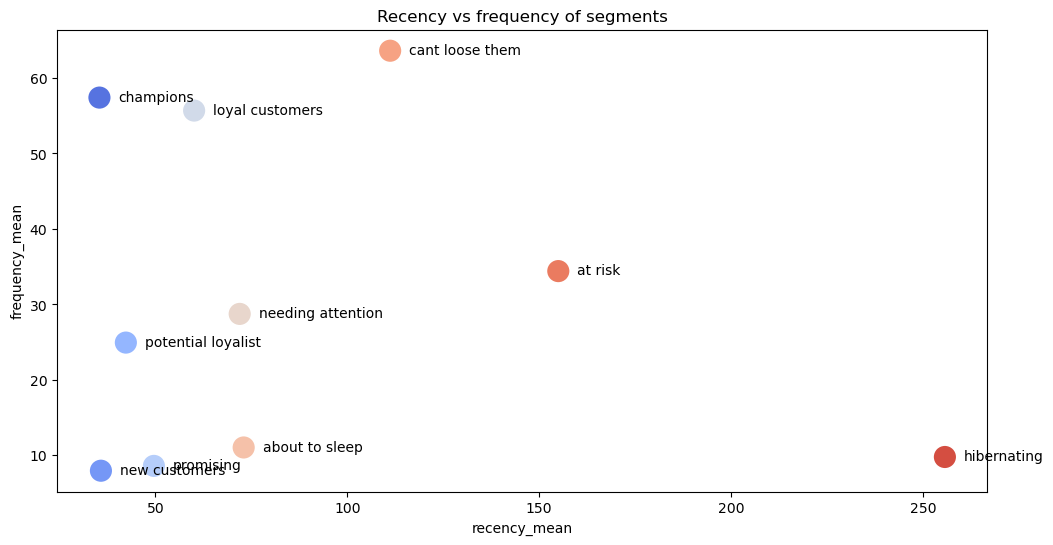

In [32]:
palette = sns.color_palette("coolwarm", 10)

fig, ax = plt.subplots(figsize=(12,6))
plot = sns.scatterplot(x='recency_mean', y='frequency_mean', data=d_analysis, hue='rfm_label', s=300, palette=palette)

for i in range(len(d_analysis)):
     plot.text(d_analysis['recency_mean'][i]+5,
               d_analysis['frequency_mean'][i]-0.5,
               d_analysis['rfm_label'][i],
               horizontalalignment='left',
               size='medium', color='black')

ax.set_title('Recency vs frequency of segments')
ax.get_legend().remove()
plt.show()

Now, let's focus on some segments which can be critically important for marketing strategies

- hibernating
- at risk
- loyal customer
- about to sleep
- champions
- potential loyalist

<b> Champions</b>

This segment constitutes 17% of the customer portfolio and also it includes 272 customers who have made their last purchases within the last week and generate an average turnover of ~335,000 unit. Because of this segment consists of customers most frequently spends and can easily adopt to new products and services, cross-sales strategies can be taken for this segment.

<b> Hibernating</b>

This segment constitutes maximum of the customer segment portfolio who is bringing the majority of the monetary sum for the company. Although they dont make purchase frequently, total transaction amounts of these customers contribute to profitability.

As a result, Cashback and bonus campaigns can be organized for this segment to retain customers and even move them to a segment that makes more purchases. In fact, discounted product offers and campaigns based on gift coupons can be planned by observing habits of other customers with similar behaviors, and analyzing according product association rules.

<b> About to sleep</b>

Customers of about to sleep segment have a higher transaction frequency, even though their spending amounts are close to the loyal customer segment. However, since these customers are nearly lost customers that made last purchases nearly 4 months ago.

### Behavioral Analysis of RFM Segments

In this part, I will examine customers' transaction history. Quantity of products in order and sales are highly correlated with each other (linear relationship) - groups of custmers who place orders with numerous products generate big sales at the same time. It implies that average price of one product is similar between segments.

Segments generating the highest sales are: 'at risk', 'loyal customers' and 'champions'. They also have high RFM score (dark purple color of a marker) and they are responsible for the highest profit (the biggest size of a marker).

In [33]:
data = data.merge(d_rfm[['customer_id', 'rfm_sum', 'rfm_label']], on='customer_id', how='left')

In [34]:
agg_dict4 = {
    'product_id': 'count',
    'quantity': 'sum',
    'sales': 'sum',
    'discount': 'sum',
    'profit': 'sum',
    'rfm_sum': 'first',
    'rfm_label': 'first'
}

data_order = data.groupby('order_id').agg(agg_dict4).reset_index()
data_order_segment = data_order.groupby('rfm_label')[['quantity', 'sales', 'discount', 'profit', 'rfm_sum']].mean().reset_index()

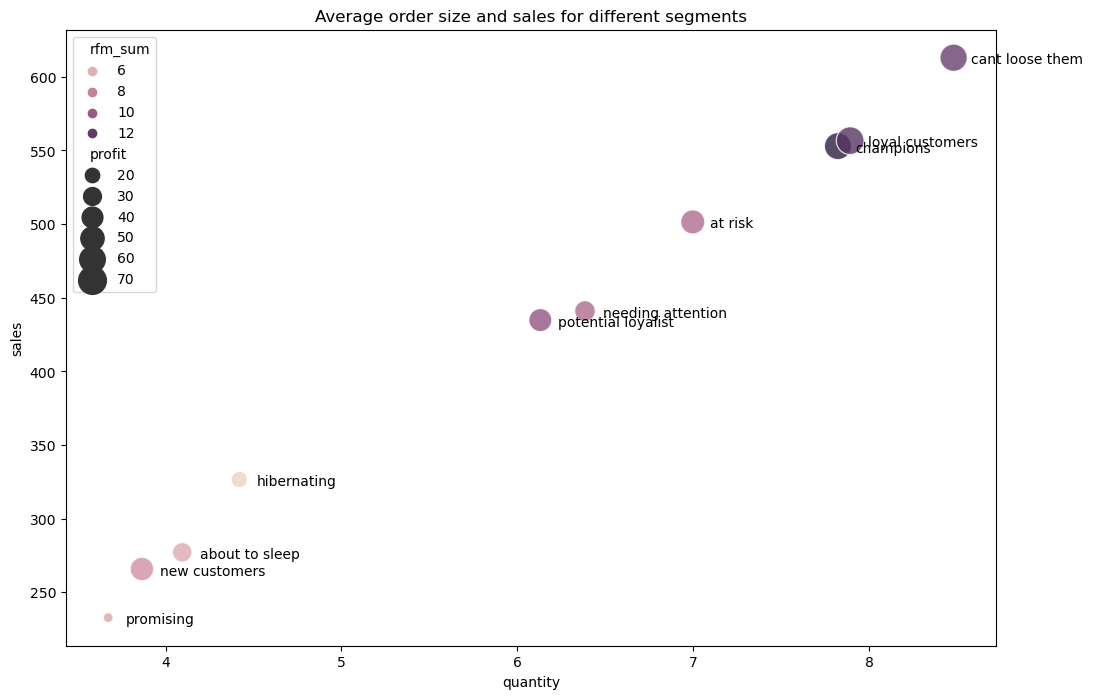

In [35]:
fig, ax = plt.subplots(figsize=(12,8))
plot = sns.scatterplot(x='quantity', y='sales', data=data_order_segment, size='profit', sizes=(50,400), hue='rfm_sum', alpha=.8)

for i in range(len(data_order_segment)):
     plot.text(data_order_segment['quantity'][i]+0.1,
               data_order_segment['sales'][i]-4,
               data_order_segment['rfm_label'][i],
               horizontalalignment='left',
               size='medium', color='black')

ax.set_title('Average order size and sales for different segments')
plt.show()

#### Reference